1. Datenaufbereitung

1.1 Datenimport und Vorbereitung

In [1]:
import pandas as pd

# Datei laden
file_path = "monthly_hourly_load_values_2022_DE.csv"

# Datei mit korrektem Trennzeichen laden
df = pd.read_csv(file_path, delimiter=';')

# Zeitspalte umwandeln
df["DateUTC"] = pd.to_datetime(df["DateUTC"], format="%d/%m/%Y %H:%M")

# Zeit als Index setzen
df.set_index("DateUTC", inplace=True)

# Ersten Einträge anzeigen
df.head()

,MeasureItem,DateShort,TimeFrom,TimeTo,CountryCode,Cov_ratio,Value,Value_ScaleTo100,CreateDate
DateUTC,,,,,,,,,
2022-01-01 00:00:00,Monthly Hourly Load Values,01/01/2022,00:00,01:00,DE,100,41535.7650,41535.7650,07/06/2023 15:31
2022-01-01 01:00:00,Monthly Hourly Load Values,01/01/2022,01:00,02:00,DE,100,40480.9050,40480.9050,07/06/2023 15:31
2022-01-01 02:00:00,Monthly Hourly Load Values,01/01/2022,02:00,03:00,DE,100,39563.9150,39563.9150,07/06/2023 15:31
2022-01-01 03:00:00,Monthly Hourly Load Values,01/01/2022,03:00,04:00,DE,100,39338.1950,39338.1950,07/06/2023 15:31
2022-01-01 04:00:00,Monthly Hourly Load Values,01/01/2022,04:00,05:00,DE,100,38826.6425,38826.6425,07/06/2023 15:31


1.2 Prüfung auf fehlende Werte und Statistik

In [5]:
# Überprüfe, ob es fehlende Werte gibt
missing_values = df.isnull().sum()

# Zeige grundlegende Statistiken der Value-Spalte
value_stats = df["Value"].describe()

# Ergebnisse anzeigen
missing_values, value_stats

(MeasureItem         0
 DateShort           0
 TimeFrom            0
 TimeTo              0
 CountryCode         0
 Cov_ratio           0
 Value               0
 Value_ScaleTo100    0
 CreateDate          0
 dtype: int64,
 count     8760.000000
 mean     55097.170699
 std       9580.367012
 min      34359.350000
 25%      47228.286875
 50%      55078.958750
 75%      62532.695625
 max      78680.765000
 Name: Value, dtype: float64)

1.3 Erstellung des Zeitreihendiagramms

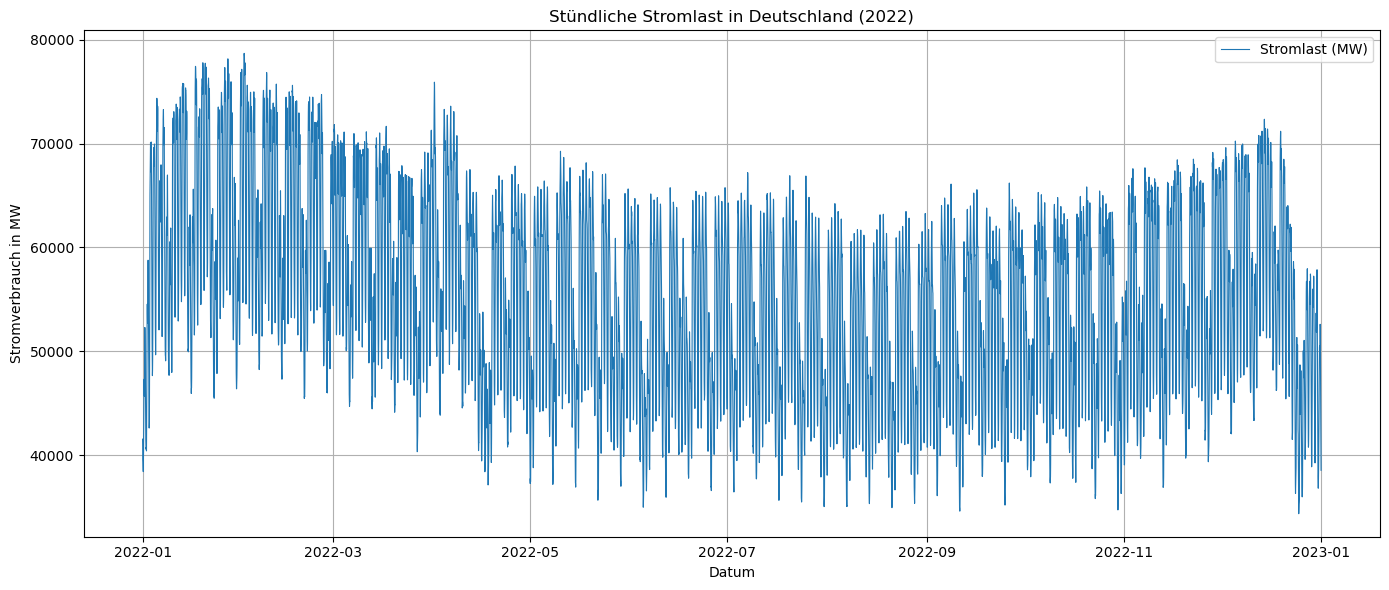

In [3]:
import matplotlib.pyplot as plt

# Plot erstellen
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["Value"], label="Stromlast (MW)", linewidth=0.8)

# Achsen beschriften und Titel setzen
plt.xlabel("Datum")
plt.ylabel("Stromverbrauch in MW")
plt.title("Stündliche Stromlast in Deutschland (2022)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

1.4 Interpretation der Zeitreihen-Visualisierung

2 Algorithmus: Long Short-Term Memory (LSTM)

2.1 Modell trainieren und evauluieren

Epoch 1/10


/opt/conda/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1048 - val_loss: 0.0072
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0067 - val_loss: 0.0039
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 8/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 9/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 10/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011 - val_loss: 0.0010
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


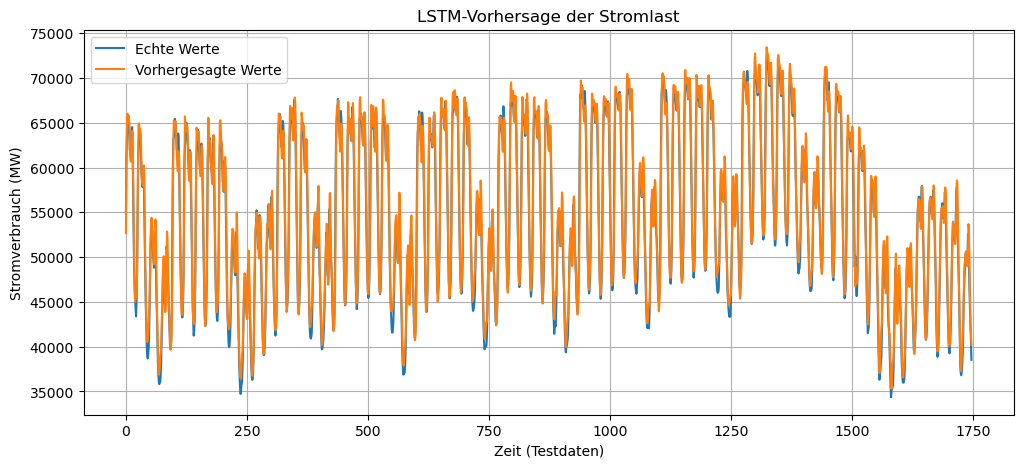

✅ Evaluation abgeschlossen: MSE = 2016021.14, MAE = 1101.42


In [7]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# 1. Nur Zielwert extrahieren
data = df["Value"].values.reshape(-1, 1)

# 2. Normalisieren
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


# 3. Sequenzen erstellen
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)


SEQ_LEN = 24  # Eingabefenster (z. B. 24 Stunden)
X, y = create_sequences(scaled_data, SEQ_LEN)

# 4. Training/Test Split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5. LSTM-Modell erstellen und trainieren
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(SEQ_LEN, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# 6. Vorhersage und Evaluation
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

# 7. Plot (optional)
plt.figure(figsize=(12, 5))
plt.plot(y_test_rescaled, label="Echte Werte")
plt.plot(y_pred_rescaled, label="Vorhergesagte Werte")
plt.title("LSTM-Vorhersage der Stromlast")
plt.xlabel("Zeit (Testdaten)")
plt.ylabel("Stromverbrauch (MW)")
plt.legend()
plt.grid(True)
plt.show()

print(f"✅ Evaluation abgeschlossen: MSE = {mse:.2f}, MAE = {mae:.2f}")

2.2 Modell mit MLflow registrieren

In [ ]:

import mlflow.keras

# MLflow-Server konfigurieren
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("TimeSeries_LSTM")

with mlflow.start_run():
    # Parameter und Metriken loggen
    mlflow.log_param("model_type", "LSTM")
    mlflow.log_param("seq_length", SEQ_LEN)
    mlflow.log_param("units", 64)
    mlflow.log_param("activation", "relu")
    mlflow.log_param("epochs", 10)
    mlflow.log_param("batch_size", 32)

    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("MAE", mae)

    # Modell loggen
    mlflow.keras.log_model(model, "lstm_model")
    model_uri = f"runs:/{mlflow.active_run().info.run_id}/lstm_model"

    # Modell registrieren
    result = mlflow.register_model(model_uri, "Electricity_LSTM_Model")
    print(f"✅ Modell registriert: {result.name}, Version {result.version}")

3 Gated Recurrent Unit (GRU)

3.1 Modell trainieren und evauluieren

Epoch 1/10


/opt/conda/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0306 - val_loss: 0.0046
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.4440e-04 - val_loss: 8.6778e-04
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.1864e-04 - val_loss: 8.5678e-04
Epoch 8/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 6.6737e-04 - val_loss: 8.8435e-04
Epoch 9/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.7521e-04 - val_loss: 6.9613e-04
Epoch 10/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.3295e-04 - val_loss: 6.5555e-04
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


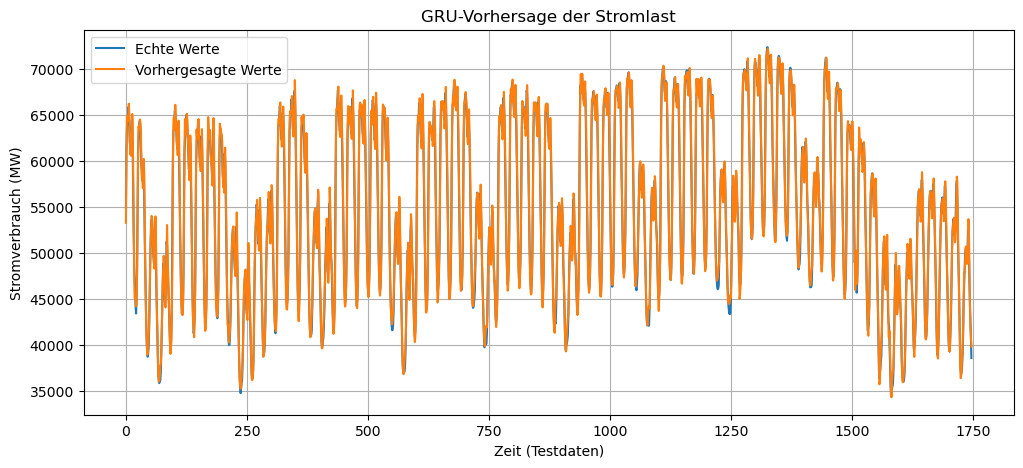

✅ GRU Evaluation abgeschlossen: MSE = 1168172.61, MAE = 821.67


In [8]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

# 1. Zielwert extrahieren
data = df["Value"].values.reshape(-1, 1)

# 2. Normalisieren
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


# 3. Sequenzen erstellen
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)


SEQ_LEN = 24  # Eingabefenster (24 Stunden)
X, y = create_sequences(scaled_data, SEQ_LEN)

# 4. Trainings- und Testdaten aufteilen
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5. GRU-Modell erstellen und trainieren
model = Sequential()
model.add(GRU(64, activation='relu', input_shape=(SEQ_LEN, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# 6. Vorhersagen und Evaluation
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

# 7. Plot (optional)
plt.figure(figsize=(12, 5))
plt.plot(y_test_rescaled, label="Echte Werte")
plt.plot(y_pred_rescaled, label="Vorhergesagte Werte")
plt.title("GRU-Vorhersage der Stromlast")
plt.xlabel("Zeit (Testdaten)")
plt.ylabel("Stromverbrauch (MW)")
plt.legend()
plt.grid(True)
plt.show()

print(f"✅ GRU Evaluation abgeschlossen: MSE = {mse:.2f}, MAE = {mae:.2f}")

3.2 Modell mit MLflow registrieren

In [ ]:

import mlflow.keras

# MLflow konfigurieren
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("TimeSeries_GRU")

with mlflow.start_run():
    # Parameter und Metriken loggen
    mlflow.log_param("model_type", "GRU")
    mlflow.log_param("seq_length", SEQ_LEN)
    mlflow.log_param("units", 64)
    mlflow.log_param("activation", "relu")
    mlflow.log_param("epochs", 10)
    mlflow.log_param("batch_size", 32)

    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("MAE", mae)

    # Modell loggen
    mlflow.keras.log_model(model, "gru_model")
    model_uri = f"runs:/{mlflow.active_run().info.run_id}/gru_model"

    # Modell registrieren
    result = mlflow.register_model(model_uri, "Electricity_GRU_Model")
    print(f"✅ Modell registriert: {result.name}, Version {result.version}")

4 ARIMA

4.1 Modell trainieren und evauluieren

/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/p

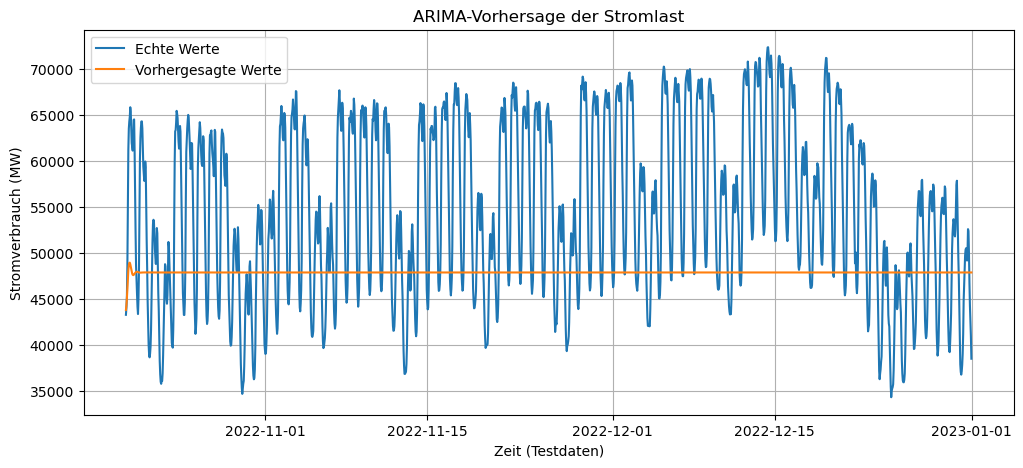

✅ ARIMA Evaluation abgeschlossen: MSE = 131212735.31, MAE = 9288.39


In [17]:

import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Nur Zielvariable
data = df["Value"]

# 2. Trainings- und Testdaten aufteilen (z. B. 80/20)
split = int(len(data) * 0.8)
train, test = data[:split], data[split:]

# 3. ARIMA-Modell definieren und trainieren (z. B. (5,1,0))
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# 4. Vorhersagen für Testbereich
forecast = model_fit.forecast(steps=len(test))
forecast = np.array(forecast)

# 5. Evaluation
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)

# 6. Plot (optional)
plt.figure(figsize=(12, 5))
plt.plot(test.index, test, label="Echte Werte")
plt.plot(test.index, forecast, label="Vorhergesagte Werte")
plt.title("ARIMA-Vorhersage der Stromlast")
plt.xlabel("Zeit (Testdaten)")
plt.ylabel("Stromverbrauch (MW)")
plt.legend()
plt.grid(True)
plt.show()

print(f"✅ ARIMA Evaluation abgeschlossen: MSE = {mse:.2f}, MAE = {mae:.2f}")

4.2 Modell mit MLflow registrieren

In [ ]:

import mlflow.pyfunc
import tempfile
import joblib
import os

# MLflow konfigurieren
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("TimeSeries_ARIMA")

with mlflow.start_run():
    # Parameter und Metriken loggen
    mlflow.log_param("model_type", "ARIMA")
    mlflow.log_param("order", "(5,1,0)")

    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("MAE", mae)

    # Modell als .pkl speichern
    with tempfile.TemporaryDirectory() as temp_dir:
        model_path = os.path.join(temp_dir, "arima_model.pkl")
        joblib.dump(model_fit, model_path)

        # Loggen und registrieren
        mlflow.log_artifact(model_path, artifact_path="arima_model")
        model_uri = f"runs:/{mlflow.active_run().info.run_id}/arima_model"
        result = mlflow.register_model(model_uri, "Electricity_ARIMA_Model")
        print(f"✅ Modell registriert: {result.name}, Version {result.version}")

5 Gradient Boosting Tree

5.1 Modell trainieren und evauluieren

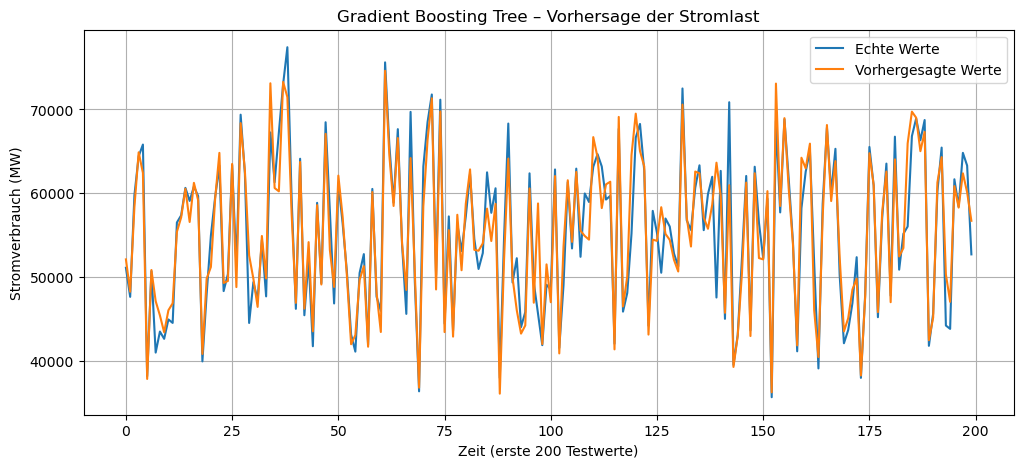

✅ XGBoost Evaluation abgeschlossen: MSE = 9543640.47, MAE = 1973.52


In [12]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# 1. Zeitbasierte Features erzeugen
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek
df["month"] = df.index.month

# 2. Eingabedaten (X) und Zielwert (y)
X = df[["hour", "dayofweek", "month"]]
y = df["Value"]

# 3. Trainings-/Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Modell erstellen und trainieren
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# 5. Vorhersage und Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# 6. Plot (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:200], label="Echte Werte")
plt.plot(y_pred[:200], label="Vorhergesagte Werte")
plt.title("Gradient Boosting Tree – Vorhersage der Stromlast")
plt.xlabel("Zeit (erste 200 Testwerte)")
plt.ylabel("Stromverbrauch (MW)")
plt.legend()
plt.grid(True)
plt.show()

print(f"✅ XGBoost Evaluation abgeschlossen: MSE = {mse:.2f}, MAE = {mae:.2f}")

5.2 Modell mit MLflow registrieren

In [ ]:

import mlflow.sklearn

# MLflow konfigurieren
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("TimeSeries_XGBoost")

with mlflow.start_run():
    # Parameter & Metriken loggen
    mlflow.log_param("model_type", "XGBoost")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("learning_rate", 0.1)
    mlflow.log_param("max_depth", 6)

    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("MAE", mae)

    # Modell loggen und registrieren
    mlflow.sklearn.log_model(model, "xgboost_model")
    model_uri = f"runs:/{mlflow.active_run().info.run_id}/xgboost_model"

    result = mlflow.register_model(model_uri, "Electricity_XGBoost_Model")
    print(f"✅ Modell registriert: {result.name}, Version {result.version}")

6 Random Forest

6.1 Modell trainieren und evauluieren

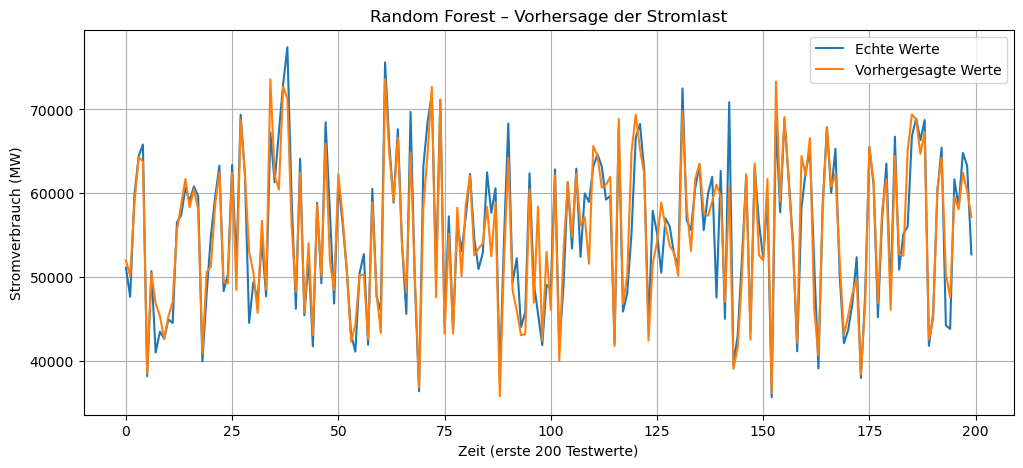

✅ Random Forest Evaluation abgeschlossen: MSE = 10837916.11, MAE = 2156.43


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Zeitbasierte Features erzeugen
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek
df["month"] = df.index.month

# 2. Eingabedaten (X) und Zielwert (y)
X = df[["hour", "dayofweek", "month"]]
y = df["Value"]

# 3. Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Modell erstellen und trainieren
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# 5. Vorhersagen und Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# 6. Plot (optional)
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:200], label="Echte Werte")
plt.plot(y_pred[:200], label="Vorhergesagte Werte")
plt.title("Random Forest – Vorhersage der Stromlast")
plt.xlabel("Zeit (erste 200 Testwerte)")
plt.ylabel("Stromverbrauch (MW)")
plt.legend()
plt.grid(True)
plt.show()

print(f"✅ Random Forest Evaluation abgeschlossen: MSE = {mse:.2f}, MAE = {mae:.2f}")

6.2 Modell mit MLflow registrieren

In [ ]:

import mlflow.sklearn

# MLflow konfigurieren
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("TimeSeries_RandomForest")

with mlflow.start_run():
    # Parameter & Metriken loggen
    mlflow.log_param("model_type", "RandomForest")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)

    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("MAE", mae)

    # Modell loggen und registrieren
    mlflow.sklearn.log_model(model, "rf_model")
    model_uri = f"runs:/{mlflow.active_run().info.run_id}/rf_model"

    result = mlflow.register_model(model_uri, "Electricity_RF_Model")
    print(f"✅ Modell registriert: 